DATASET DESCRPTION:

#The Crime Dataset is about Crimes which have taken place in India over the years. 
#This dataset has 600 Rows and 14 Columns, which offers valuable insights for crime-pattern based analysis,policy-making and crime prevention strategies
#The various attributes or features of the dataset are:

#Date Reported: The date on which the crime was officially reported to authorities, aiding in understanding reporting delays and their patterns.

#Date of Occurrence: The actual date when the crime took place, useful for analyzing crime trends over time.

#Time of Occurrence: The specific time when the crime occurred, helping to identify high-risk time periods for various types of crimes.

#City: The city where the crime was reported, enabling geographic crime mapping and regional comparisons.

#Crime Code: A unique identifier or code assigned to each type of crime, facilitating categorical analysis and trend identification.

#Crime Description: A detailed narrative or classification of the crime committed, offering qualitative context for the incident.

#Victim Age: The age of the victim involved, useful for demographic analysis and vulnerability assessments.

#Victim Gender: The gender of the victim, providing insights into gender-specific crime patterns and prevention strategies.

#Weapon Used: Information on the weapon or tools used in the crime, aiding in understanding crime severity and planning countermeasures.

#Crime Domain: The broader category or domain of the crime (e.g., Violent,Traffic Fatality), helping to classify and study crimes within specific areas.

#Police Deployed: The number or type of police personnel involved in responding to or investigating the crime, useful for resource allocation analysis.

#Case Closed: A binary attribute indicating whether the case has been resolved (closed) or is still open, useful for evaluating the efficiency of the judicial and law enforcement processes.


The primary motive for analyzing the crimes dataset is to understand trends, patterns, and demographics of crimes across different regions and timeframes. This helps in identifying high-risk areas, optimizing resource allocation, and developing targeted strategies for crime prevention. Insights can guide policymakers, law enforcement, and public awareness campaigns to enhance safety and reduce crime rates. Additionally, the analysis supports judicial processes by identifying factors influencing case closures and delays. Ultimately, the goal is to use data-driven insights to make communities safer and more informed.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
#Importing the dataset
df = pd.read_csv("C:/Users/Sumit Emmanuel/OneDrive/Desktop/BCA/crimes.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       600 non-null    int64 
 1   Date Reported       600 non-null    object
 2   Date of Occurrence  600 non-null    object
 3   Time of Occurrence  600 non-null    object
 4   City                600 non-null    object
 5   Crime Code          600 non-null    int64 
 6   Crime Description   600 non-null    object
 7   Victim Age          600 non-null    int64 
 8   Victim Gender       600 non-null    object
 9   Weapon Used         511 non-null    object
 10  Crime Domain        600 non-null    object
 11  Police Deployed     600 non-null    int64 
 12  Case Closed         600 non-null    object
 13  Date Case Closed    291 non-null    object
dtypes: int64(4), object(10)
memory usage: 65.8+ KB


In [5]:
df.isnull().sum()

Report Number           0
Date Reported           0
Date of Occurrence      0
Time of Occurrence      0
City                    0
Crime Code              0
Crime Description       0
Victim Age              0
Victim Gender           0
Weapon Used            89
Crime Domain            0
Police Deployed         0
Case Closed             0
Date Case Closed      309
dtype: int64

In [6]:
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02/01/2020 00:00,01/01/2020 00:00,01/01/2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01/01/2020 19:00,01/01/2020 01:00,01/01/2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02/01/2020 05:00,01/01/2020 02:00,01/01/2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01/01/2020 05:00,01/01/2020 03:00,01/01/2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29/04/2020 05:00
4,5,01/01/2020 21:00,01/01/2020 04:00,01/01/2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08/01/2020 21:00


In [7]:
#Change the Date Columns into Date and Time Format
date_columns = ['Date Reported', 'Date of Occurrence', 'Date Case Closed']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_19468\3112226796.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [8]:
#TO REMOVE DATE CASE CLOSED AND REPORT NUMBER COLUMNS/FEATURES
remove = ['Date Case Closed', 'Report Number'] 
df = df.drop(columns=remove, errors='ignore')

df.to_csv('crimes_dataset.csv', index=False)

print("Columns after removal:")
print(df.columns)

Columns after removal:
Index(['Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'City',
       'Crime Code', 'Crime Description', 'Victim Age', 'Victim Gender',
       'Weapon Used', 'Crime Domain', 'Police Deployed', 'Case Closed'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date Reported       254 non-null    datetime64[ns]
 1   Date of Occurrence  288 non-null    datetime64[ns]
 2   Time of Occurrence  600 non-null    object        
 3   City                600 non-null    object        
 4   Crime Code          600 non-null    int64         
 5   Crime Description   600 non-null    object        
 6   Victim Age          600 non-null    int64         
 7   Victim Gender       600 non-null    object        
 8   Weapon Used         511 non-null    object        
 9   Crime Domain        600 non-null    object        
 10  Police Deployed     600 non-null    int64         
 11  Case Closed         600 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 56.4+ KB


In [10]:
df.isnull().sum()

Date Reported         346
Date of Occurrence    312
Time of Occurrence      0
City                    0
Crime Code              0
Crime Description       0
Victim Age              0
Victim Gender           0
Weapon Used            89
Crime Domain            0
Police Deployed         0
Case Closed             0
dtype: int64

In [11]:
#TO FILL MISSING CATEGORICAL VALUES WITH MOST FREQUENT VALUE(Weapon Used)
if 'Weapon Used' in df.columns:
    df['Weapon Used'] = df['Weapon Used'].fillna(df['Weapon Used'].mode()[0])

In [12]:
print("Missing Values After Filling:")
print(df.isnull().sum())

Missing Values After Filling:
Date Reported         346
Date of Occurrence    312
Time of Occurrence      0
City                    0
Crime Code              0
Crime Description       0
Victim Age              0
Victim Gender           0
Weapon Used             0
Crime Domain            0
Police Deployed         0
Case Closed             0
dtype: int64


In [13]:
# Forward fill
df['Date Reported'] = df['Date Reported'].ffill()
df['Date of Occurrence'] = df['Date of Occurrence'].ffill()

# Backward fill
df['Date Reported'] = df['Date Reported'].bfill()
df['Date of Occurrence'] = df['Date of Occurrence'].bfill()

In [14]:
print("Missing Values After Filling:")
print(df.isnull().sum())

Missing Values After Filling:
Date Reported         0
Date of Occurrence    0
Time of Occurrence    0
City                  0
Crime Code            0
Crime Description     0
Victim Age            0
Victim Gender         0
Weapon Used           0
Crime Domain          0
Police Deployed       0
Case Closed           0
dtype: int64


In [15]:
df.dtypes

Date Reported         datetime64[ns]
Date of Occurrence    datetime64[ns]
Time of Occurrence            object
City                          object
Crime Code                     int64
Crime Description             object
Victim Age                     int64
Victim Gender                 object
Weapon Used                   object
Crime Domain                  object
Police Deployed                int64
Case Closed                   object
dtype: object

count    600.000000
mean      44.348333
std       19.824362
min       10.000000
25%       28.000000
50%       44.000000
75%       61.250000
max       79.000000
Name: Victim Age, dtype: float64


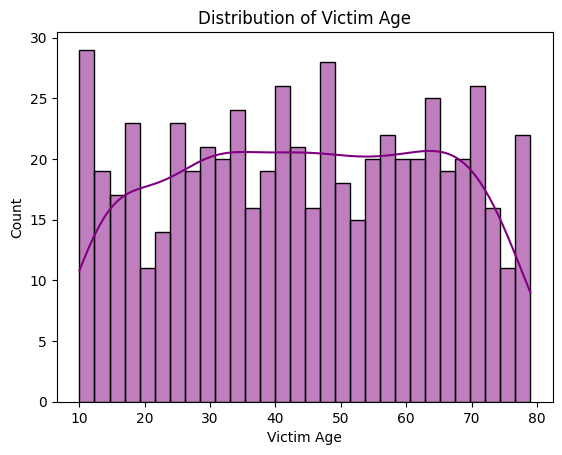

In [17]:
# HistPlot showing Victim Age
numerical_col = 'Victim Age' 
print(df[numerical_col].describe())
sns.histplot(df[numerical_col], kde=True, bins=30, color='purple')
plt.title(f'Distribution of {numerical_col}')
plt.show()

#This Bar Chart is used to show which city has how much distribution of crimes. For Eg: Delhi has the Highest Distribution of any crime

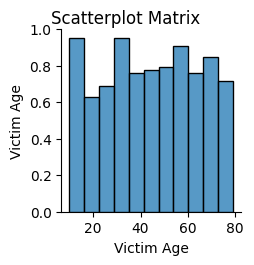

In [19]:
# Scatterplot matrix of numerical variables
numerical_cols = ['Victim Age', 'City', 'Weapon Used'] 
sns.pairplot(df[numerical_cols], diag_kind='auto')
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

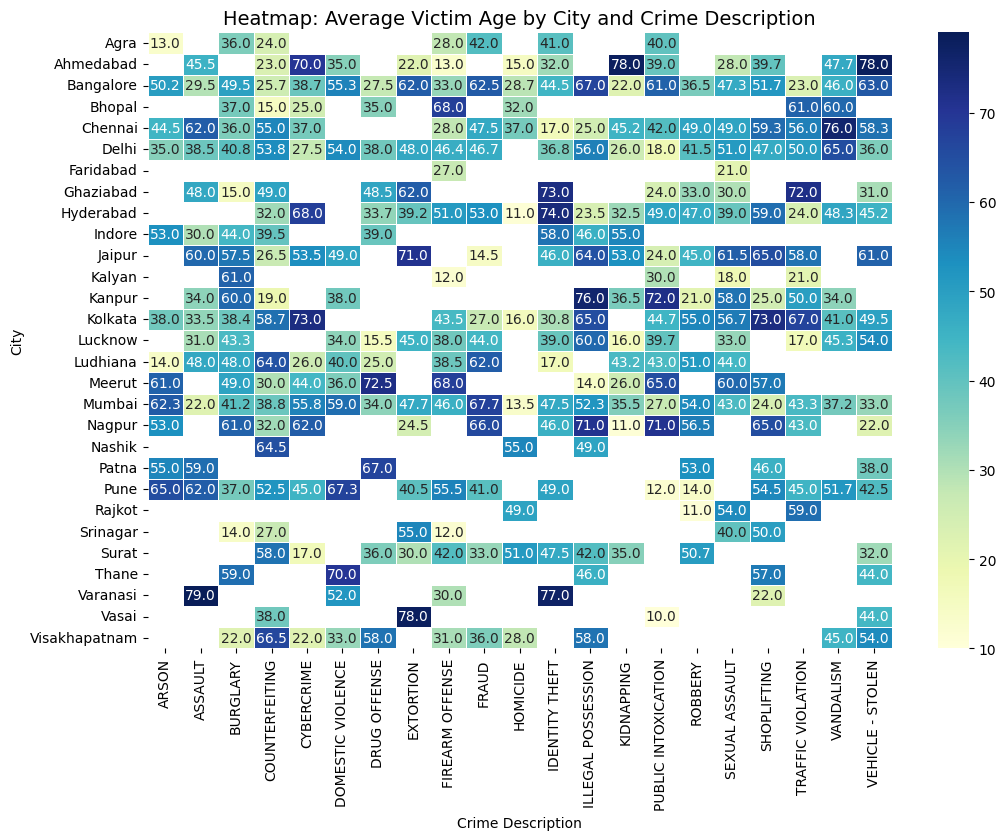

In [18]:
heatmap_data = df.pivot_table(
    index='City',
    columns='Crime Description',
    values='Victim Age',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Heatmap: Average Victim Age by City and Crime Description", fontsize=14)
plt.show()

#This Heat Map Displays the average Victim Age by the City and the Crime. For eg. In NAgpur the Avg Victim Age for Robbery is 56 Years

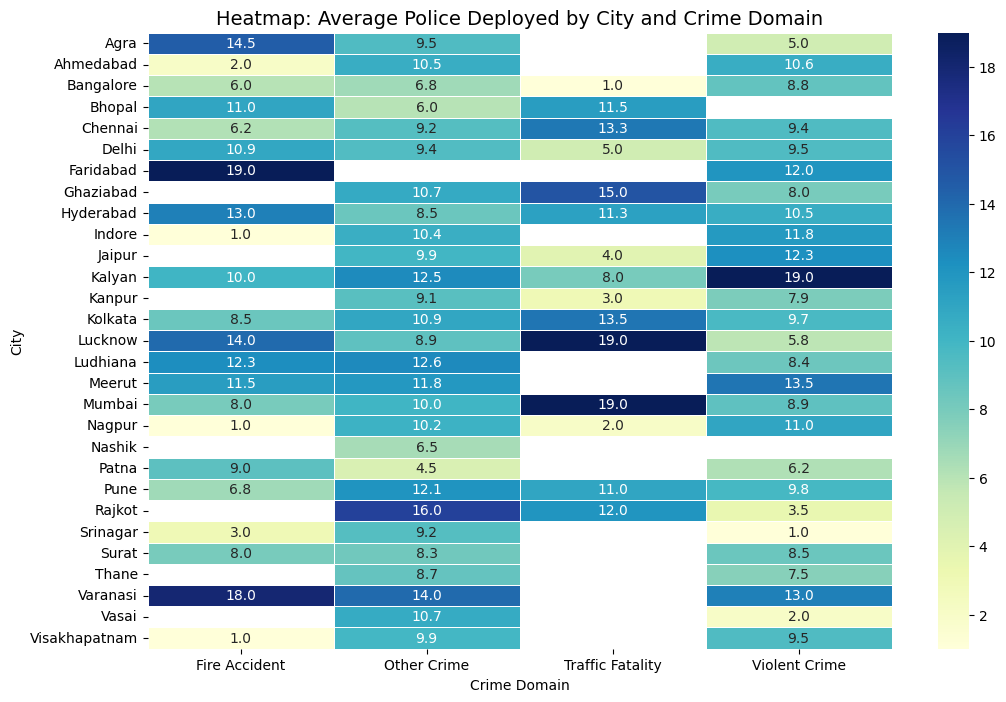

In [20]:
# Average Police Deployment by City and Crime
heatmap_data = df.pivot_table(index='City',columns='Crime Domain',values='Police Deployed',aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Heatmap: Average Police Deployed by City and Crime Domain", fontsize=14)
plt.show()
#Highlights how Police are Deployed across various City depending on the Crime Domain.

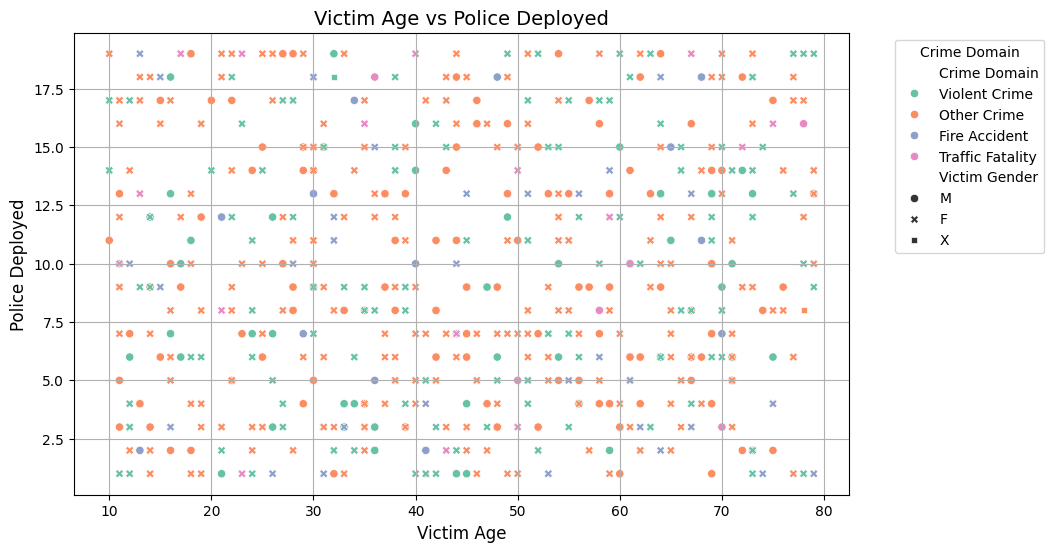

In [21]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(df,x='Victim Age',y='Police Deployed',hue='Crime Domain',style='Victim Gender',palette='Set2')
plt.title("Victim Age vs Police Deployed", fontsize=14)
plt.xlabel("Victim Age", fontsize=12)
plt.ylabel("Police Deployed", fontsize=12)
plt.legend(title="Crime Domain", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

#Interpretation:
#This scatter plot shows the relationship between Victim Age and Police Deployed, with data points categorized by Crime Domain and Victim Gender. 
#It highlights patterns in police deployment across different crime domains and victim demographics.

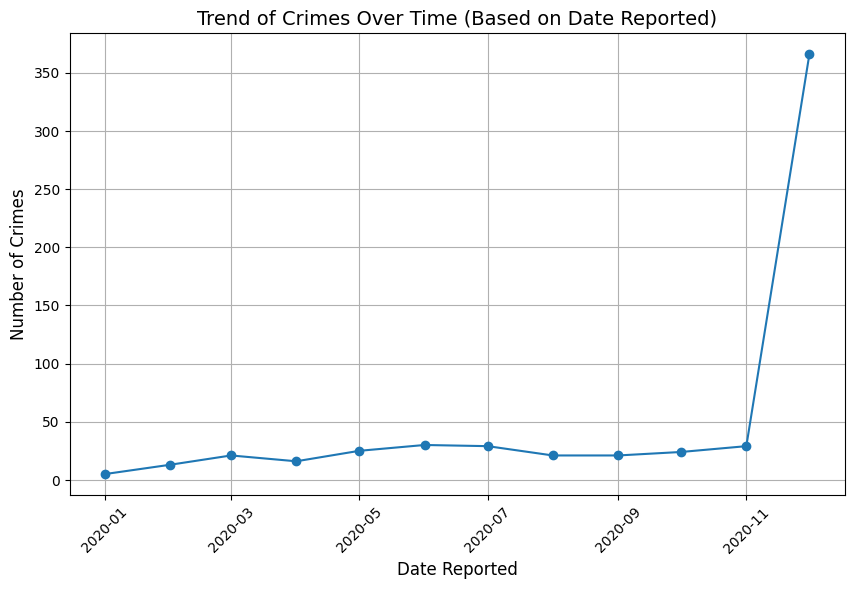

In [22]:
crime_trend = df.groupby(df['Date Reported'].dt.date).size()
plt.figure(figsize=(10, 6))
plt.plot(crime_trend.index, crime_trend.values, marker='o', linestyle='-')
plt.title("Trend of Crimes Over Time (Based on Date Reported)", fontsize=14)
plt.xlabel("Date Reported", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

#Interpretation:
#This Line Chart is used to show the trends of crimes reported based on Date of Reporting of Crime 
#For Eg: In July of 2020 on average 30 Crimes were reported daily

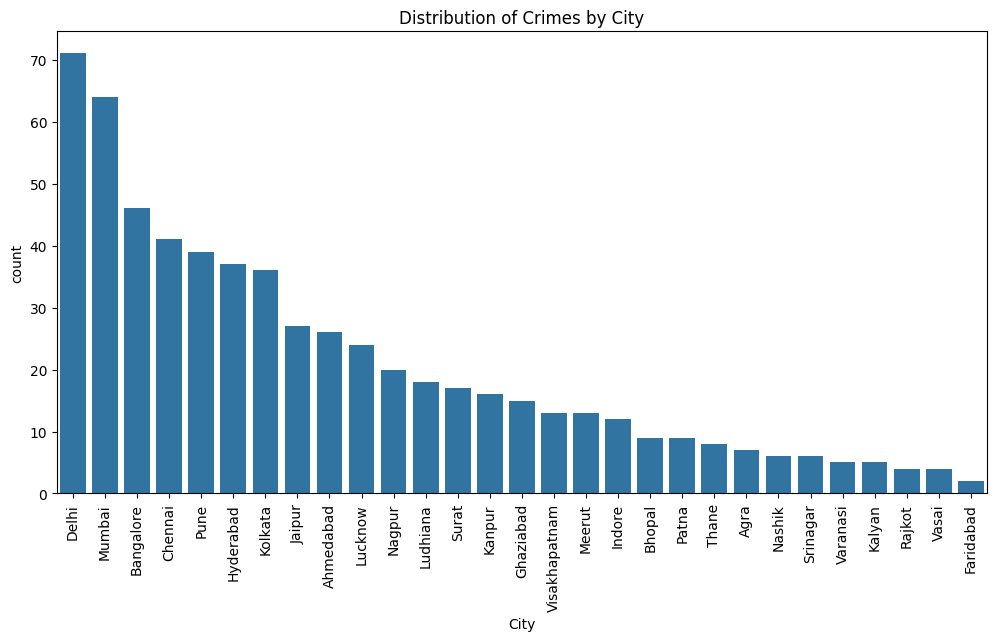

In [23]:
# Chart showing Distribution of Crimes by City
plt.figure(figsize=(12, 6))
sns.countplot(df, x='City', order=df['City'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Crimes by City')
plt.show()

#Interpretation:
#This Bar Chart is used to show which city has how much distribution of crimes.
#For Eg: Delhi has the Highest Distribution of any crime

Weapon Used
Other           185
Knife            92
Blunt Object     91
Explosives       81
Poison           80
Firearm          71
Name: count, dtype: int64


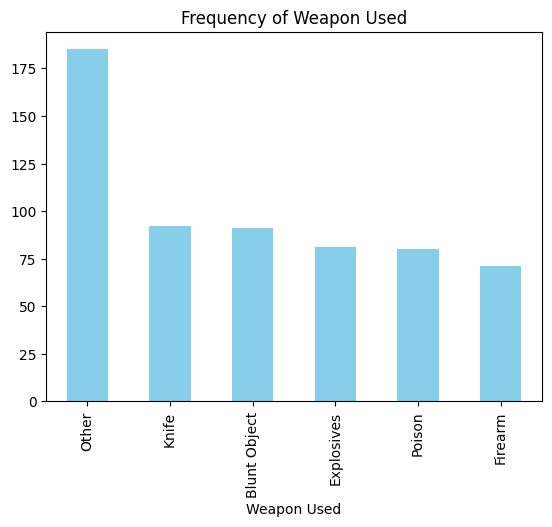

count    600.000000
mean      44.348333
std       19.824362
min       10.000000
25%       28.000000
50%       44.000000
75%       61.250000
max       79.000000
Name: Victim Age, dtype: float64


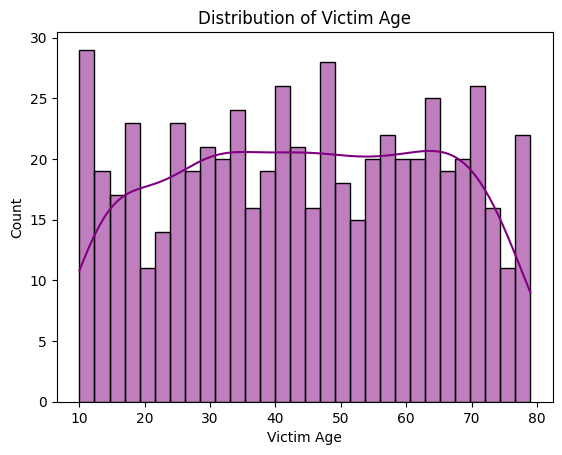

In [24]:
# Bar Chart on Frequency of Weapon Used Across the Country
categorical_col = 'Weapon Used' 
print(df[categorical_col].value_counts())
df[categorical_col].value_counts().plot(kind='bar', color='skyblue', title='Frequency of Weapon Used')
plt.show()

#Interpretation:
#This Bar Chart shows the frequency of weapons which are used to commit crimes across various parts of the country

# HistPlot showing Victim Age
numerical_col = 'Victim Age' 
print(df[numerical_col].describe())
sns.histplot(df[numerical_col], kde=True, bins=30, color='purple')
plt.title(f'Distribution of {numerical_col}')
plt.show()

#Interpretation:
#This HistPlot shows the frequency of which age group has the highest number of victims of crime

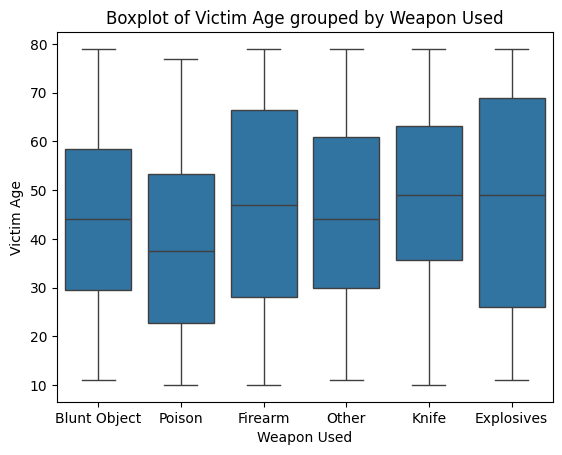

In [25]:
# Numerical vs Categorical: Boxplot
sns.boxplot(x=df['Weapon Used'], y=df['Victim Age'])
plt.title(f'Boxplot of {'Victim Age'} grouped by {'Weapon Used'}')
plt.show()

#Interpretation:
#We can interpret that which age group people are killed or injured with which weapon.
#For eg.Firearm is used to injure or kill people between the age group of 25 to 65

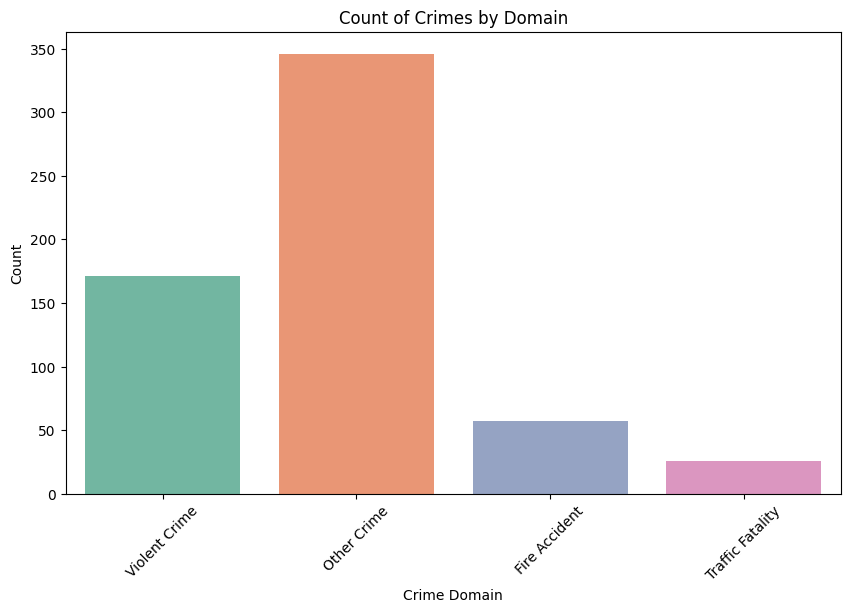

In [26]:

plt.figure(figsize=(10, 6))
sns.countplot(df, x='Crime Domain', hue='Crime Domain', dodge=False, legend=False, palette='Set2')
plt.title('Count of Crimes by Domain')
plt.xlabel('Crime Domain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# This displays the Count based on Crime Domain, the next after various crimes are 170 on average


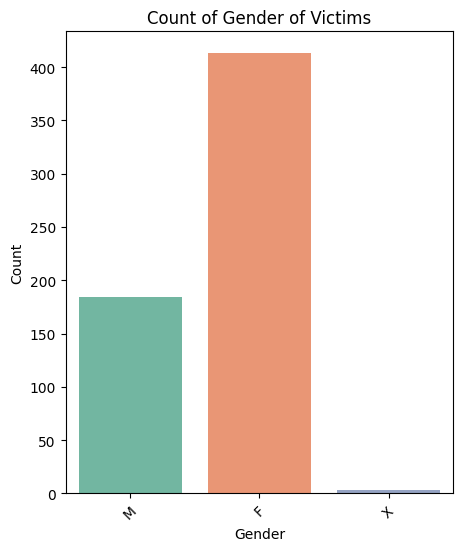

In [27]:
# Example for one variable: 'City'
plt.figure(figsize=(5, 6))
sns.countplot(df, x='Victim Gender', hue='Victim Gender', dodge=False, legend=False, palette='Set2')
plt.title('Count of Gender of Victims')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#This shows the Count of Victims by Gender. Maximum of the victims on whom the crimes are perpetrated despite the Domain and Description are Women

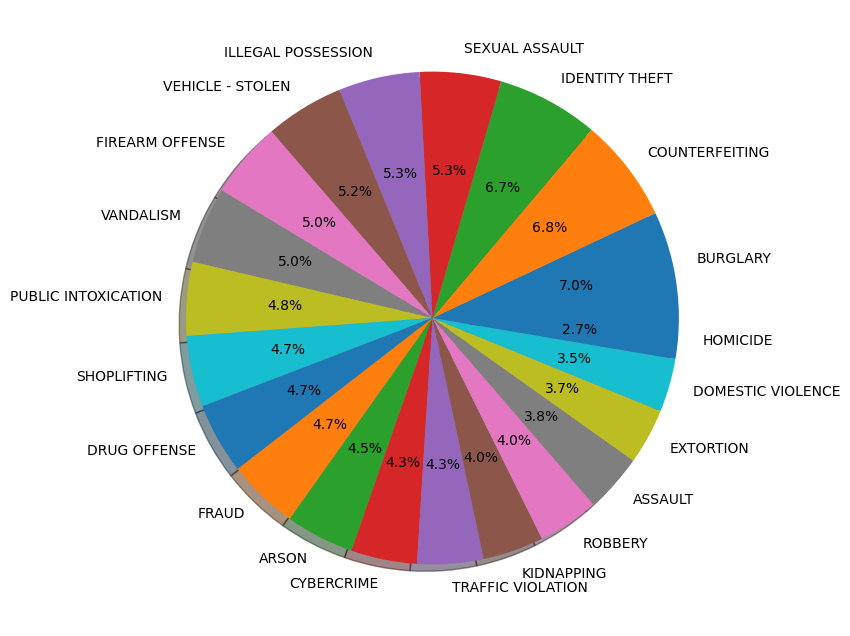

In [28]:
name = df['Crime Description'].value_counts().index
val = df['Crime Description'].value_counts().values


plt.figure(figsize = (8,8))
plt.pie(x = val , labels  = name , shadow = True , autopct = '%1.1f%%')
plt.show()


EDA for Nominal Data - City
City
Delhi            71
Mumbai           64
Bangalore        46
Chennai          41
Pune             39
Hyderabad        37
Kolkata          36
Jaipur           27
Ahmedabad        26
Lucknow          24
Nagpur           20
Ludhiana         18
Surat            17
Kanpur           16
Ghaziabad        15
Visakhapatnam    13
Meerut           13
Indore           12
Bhopal            9
Patna             9
Thane             8
Agra              7
Nashik            6
Srinagar          6
Varanasi          5
Kalyan            5
Rajkot            4
Vasai             4
Faridabad         2
Name: count, dtype: int64


C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_19468\3685089321.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,y=nominal_column, palette='Set2', order=df[nominal_column].value_counts().index)


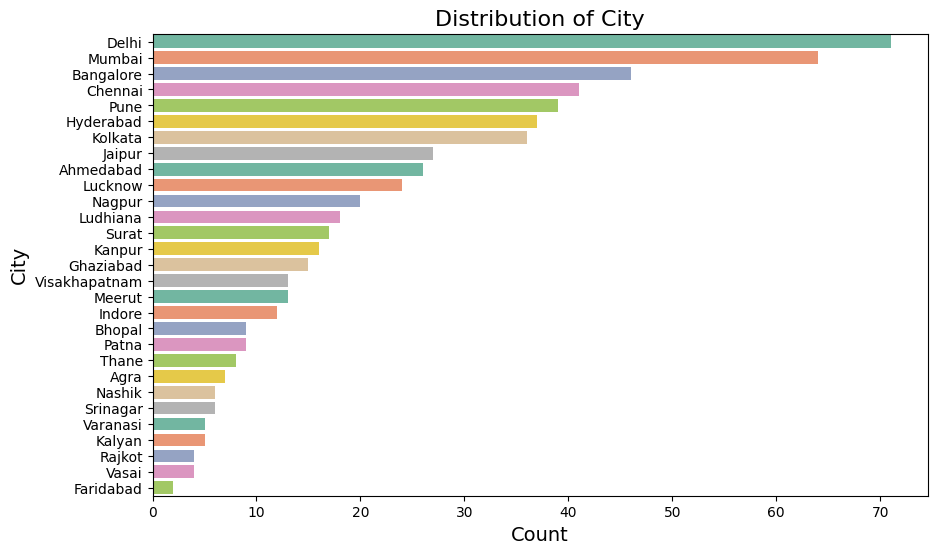


EDA for Ordinal Data - Victim Age
Victim Age
69    14
44    14
30    14
11    14
73    13
      ..
76     4
10     4
57     4
74     3
20     2
Name: count, Length: 70, dtype: int64


C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_19468\3685089321.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,y=ordinal_column, palette='Set3', order=df[ordinal_column].value_counts().index)


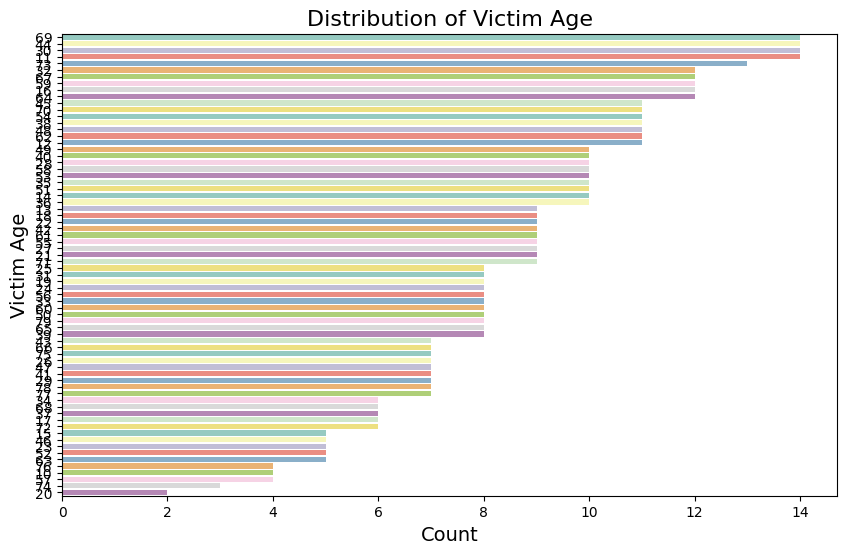


Binary Encoding for City:
   City_0  City_1  City_2  City_3  City_4
0       0       0       0       0       1
1       0       0       0       1       0
2       0       0       0       1       1
3       0       0       1       0       0
4       0       0       1       0       0


In [31]:
import category_encoders as ce


# Categorical Data Columns
nominal_column = 'City'  
ordinal_column = 'Victim Age'  

# EDA for Nominal Data
print(f"\nEDA for Nominal Data - {nominal_column}")
print(df[nominal_column].value_counts())

# Bar plot for Nominal Data
plt.figure(figsize=(10, 6))
sns.countplot(df,y=nominal_column, palette='Set2', order=df[nominal_column].value_counts().index)
plt.title(f"Distribution of {nominal_column}", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel(nominal_column, fontsize=14)
plt.show()

#EDA for Ordinal Data 
print(f"\nEDA for Ordinal Data - {ordinal_column}")
print(df[ordinal_column].value_counts())

# Bar plot for Ordinal Data
plt.figure(figsize=(10, 6))
sns.countplot(df,y=ordinal_column, palette='Set3', order=df[ordinal_column].value_counts().index)
plt.title(f"Distribution of {ordinal_column}", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel(ordinal_column, fontsize=14)
plt.show()


# Binary Encoding for Nominal Data
binary_encoder = ce.BinaryEncoder(cols=[nominal_column])
binary_encoded_data = binary_encoder.fit_transform(df[nominal_column])
print(f"\nBinary Encoding for {nominal_column}:")
print(binary_encoded_data.head())

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date Reported       600 non-null    datetime64[ns]
 1   Date of Occurrence  600 non-null    datetime64[ns]
 2   Time of Occurrence  600 non-null    object        
 3   City                600 non-null    object        
 4   Crime Code          600 non-null    int64         
 5   Crime Description   600 non-null    object        
 6   Victim Age          600 non-null    int64         
 7   Victim Gender       600 non-null    object        
 8   Weapon Used         600 non-null    object        
 9   Crime Domain        600 non-null    object        
 10  Police Deployed     600 non-null    int64         
 11  Case Closed         600 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 56.4+ KB


In [34]:
# One Hot Encoding

import pandas as pd

df_one_hot = pd.get_dummies(df, columns=['City'])

# Display the result
print(df_one_hot.head())

#Converts Each unique City Column into a seperate binary bins  


        Date Reported  Date of Occurrence Time of Occurrence  Crime Code  \
0 2020-02-01 00:00:00 2020-01-01 00:00:00   01/01/2020 01:11         576   
1 2020-01-01 19:00:00 2020-01-01 01:00:00   01/01/2020 06:26         128   
2 2020-02-01 05:00:00 2020-01-01 02:00:00   01/01/2020 14:30         271   
3 2020-01-01 05:00:00 2020-01-01 03:00:00   01/01/2020 14:46         170   
4 2020-01-01 21:00:00 2020-01-01 04:00:00   01/01/2020 16:51         421   

  Crime Description  Victim Age Victim Gender   Weapon Used   Crime Domain  \
0    IDENTITY THEFT          16             M  Blunt Object  Violent Crime   
1          HOMICIDE          37             M        Poison    Other Crime   
2        KIDNAPPING          48             F  Blunt Object    Other Crime   
3          BURGLARY          49             F       Firearm    Other Crime   
4         VANDALISM          30             F         Other    Other Crime   

   Police Deployed  ... City_Nashik  City_Patna  City_Pune  City_Rajkot  \

In [35]:
#Dummy Encoding
df_dummy = pd.get_dummies(df, columns=['Crime Domain'], drop_first=True)

print(df_dummy)

# It drops the first category of the Crime Domain to avoid collinearity.


          Date Reported  Date of Occurrence Time of Occurrence       City  \
0   2020-02-01 00:00:00 2020-01-01 00:00:00   01/01/2020 01:11  Ahmedabad   
1   2020-01-01 19:00:00 2020-01-01 01:00:00   01/01/2020 06:26    Chennai   
2   2020-02-01 05:00:00 2020-01-01 02:00:00   01/01/2020 14:30   Ludhiana   
3   2020-01-01 05:00:00 2020-01-01 03:00:00   01/01/2020 14:46       Pune   
4   2020-01-01 21:00:00 2020-01-01 04:00:00   01/01/2020 16:51       Pune   
..                  ...                 ...                ...        ...   
595 2020-12-01 23:00:00 2020-01-12 23:00:00   26/01/2020 15:56  Bangalore   
596 2020-12-01 23:00:00 2020-01-12 23:00:00   26/01/2020 03:36       Pune   
597 2020-12-01 23:00:00 2020-01-12 23:00:00   26/01/2020 11:18    Chennai   
598 2020-12-01 23:00:00 2020-01-12 23:00:00   26/01/2020 19:04  Bangalore   
599 2020-12-01 23:00:00 2020-01-12 23:00:00   26/01/2020 13:14     Mumbai   

     Crime Code    Crime Description  Victim Age Victim Gender   Weapon Use

In [36]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'City' column
df['City_Label_Encoded'] = label_encoder.fit_transform(df['City'])

# Display the result
print(df[['City', 'City_Label_Encoded']].head())
#This Output of Label Encoding on City Showcases the City Names along with the unique identifier which has been assigned to it


        City  City_Label_Encoded
0  Ahmedabad                   1
1    Chennai                   4
2   Ludhiana                  15
3       Pune                  21
4       Pune                  21


In [37]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

df['CrimeDomain_Label_Encoded'] = label_encoder.fit_transform(df['Crime Domain'])

print(df[['Crime Domain', 'CrimeDomain_Label_Encoded']].head())

#This Output of Label Encoding on Crime Domain Showcases the Crime Domain along with the unique identifier which has been assigned to it


    Crime Domain  CrimeDomain_Label_Encoded
0  Violent Crime                          3
1    Other Crime                          1
2    Other Crime                          1
3    Other Crime                          1
4    Other Crime                          1


In [38]:
import category_encoders as ce


binary_encoder = ce.BinaryEncoder(cols=['Case Closed'])


df_binary = binary_encoder.fit_transform(df)


print(df_binary.head())

#This Output of Case Closed is displayed in Binary Form as Case Closed(NO) as 0 and Case Closed(YES) as 1

        Date Reported  Date of Occurrence Time of Occurrence       City  \
0 2020-02-01 00:00:00 2020-01-01 00:00:00   01/01/2020 01:11  Ahmedabad   
1 2020-01-01 19:00:00 2020-01-01 01:00:00   01/01/2020 06:26    Chennai   
2 2020-02-01 05:00:00 2020-01-01 02:00:00   01/01/2020 14:30   Ludhiana   
3 2020-01-01 05:00:00 2020-01-01 03:00:00   01/01/2020 14:46       Pune   
4 2020-01-01 21:00:00 2020-01-01 04:00:00   01/01/2020 16:51       Pune   

   Crime Code Crime Description  Victim Age Victim Gender   Weapon Used  \
0         576    IDENTITY THEFT          16             M  Blunt Object   
1         128          HOMICIDE          37             M        Poison   
2         271        KIDNAPPING          48             F  Blunt Object   
3         170          BURGLARY          49             F       Firearm   
4         421         VANDALISM          30             F         Other   

    Crime Domain  Police Deployed  Case Closed_0  Case Closed_1  \
0  Violent Crime               

In [39]:
df.drop(['Date of Occurrence', 'Time of Occurrence'], axis=1, inplace=True)

In [40]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns


label_encoders = {}


for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  


print(df.head())

#TO CONVERET THE OBJECT COLUMNS TO NUMERICAL


        Date Reported  City  Crime Code  Crime Description  Victim Age  \
0 2020-02-01 00:00:00     1         576                 11          16   
1 2020-01-01 19:00:00     4         128                 10          37   
2 2020-02-01 05:00:00    15         271                 13          48   
3 2020-01-01 05:00:00    21         170                  2          49   
4 2020-01-01 21:00:00    21         421                 19          30   

   Victim Gender  Weapon Used  Crime Domain  Police Deployed  Case Closed  \
0              1            0             3               13            0   
1              1            5             1                9            0   
2              0            0             1               15            0   
3              0            2             1                1            1   
4              0            4             1               18            1   

   City_Label_Encoded  CrimeDomain_Label_Encoded  
0                   1                    

Train Split Test

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date Reported              600 non-null    datetime64[ns]
 1   City                       600 non-null    int32         
 2   Crime Code                 600 non-null    int64         
 3   Crime Description          600 non-null    int32         
 4   Victim Age                 600 non-null    int64         
 5   Victim Gender              600 non-null    int32         
 6   Weapon Used                600 non-null    int32         
 7   Crime Domain               600 non-null    int32         
 8   Police Deployed            600 non-null    int64         
 9   Case Closed                600 non-null    int32         
 10  City_Label_Encoded         600 non-null    int32         
 11  CrimeDomain_Label_Encoded  600 non-null    int32         
dtypes: datet

In [43]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns


label_encoders = {}


for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  


print(df.head())

#TO CONVERET THE OBJECT COLUMNS TO NUMERICAL


        Date Reported  City  Crime Code  Crime Description  Victim Age  \
0 2020-02-01 00:00:00     1         576                 11          16   
1 2020-01-01 19:00:00     4         128                 10          37   
2 2020-02-01 05:00:00    15         271                 13          48   
3 2020-01-01 05:00:00    21         170                  2          49   
4 2020-01-01 21:00:00    21         421                 19          30   

   Victim Gender  Weapon Used  Crime Domain  Police Deployed  Case Closed  \
0              1            0             3               13            0   
1              1            5             1                9            0   
2              0            0             1               15            0   
3              0            2             1                1            1   
4              0            4             1               18            1   

   City_Label_Encoded  CrimeDomain_Label_Encoded  
0                   1                    

In [44]:
# Convert category columns to numerical codes
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes


float_columns = df.select_dtypes(include=['float64']).columns
for col in float_columns:
    df[col] = df[col].astype(int) 


print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date Reported              600 non-null    datetime64[ns]
 1   City                       600 non-null    int32         
 2   Crime Code                 600 non-null    int64         
 3   Crime Description          600 non-null    int32         
 4   Victim Age                 600 non-null    int64         
 5   Victim Gender              600 non-null    int32         
 6   Weapon Used                600 non-null    int32         
 7   Crime Domain               600 non-null    int32         
 8   Police Deployed            600 non-null    int64         
 9   Case Closed                600 non-null    int32         
 10  City_Label_Encoded         600 non-null    int32         
 11  CrimeDomain_Label_Encoded  600 non-null    int32         
dtypes: datet

In [ ]:
# Convert datetime column to an integer
datetime_columns = df.select_dtypes(include=['datetime64[ns]']).columns
for col in datetime_columns:
    df[col + '_Int'] = df[col].astype('int64') // 10**9

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date Reported              600 non-null    datetime64[ns]
 1   City                       600 non-null    int32         
 2   Crime Code                 600 non-null    int64         
 3   Crime Description          600 non-null    int32         
 4   Victim Age                 600 non-null    int64         
 5   Victim Gender              600 non-null    int32         
 6   Weapon Used                600 non-null    int32         
 7   Crime Domain               600 non-null    int32         
 8   Police Deployed            600 non-null    int64         
 9   Case Closed                600 non-null    int32         
 10  City_Label_Encoded         600 non-null    int32         
 11  CrimeDomain_Label_Encoded  600 non-null    int32         
 12  Date Rep

In [48]:
df = df.drop(columns=[col])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   City                       600 non-null    int32
 1   Crime Code                 600 non-null    int64
 2   Crime Description          600 non-null    int32
 3   Victim Age                 600 non-null    int64
 4   Victim Gender              600 non-null    int32
 5   Weapon Used                600 non-null    int32
 6   Crime Domain               600 non-null    int32
 7   Police Deployed            600 non-null    int64
 8   Case Closed                600 non-null    int32
 9   City_Label_Encoded         600 non-null    int32
 10  CrimeDomain_Label_Encoded  600 non-null    int32
 11  Date Reported_Int          600 non-null    int64
dtypes: int32(8), int64(4)
memory usage: 37.6 KB


Train Test the Dataset

In [50]:
# Feature matrix (X) and target variable (y)
X = df.drop(columns=['Case Closed']) 
y = df['Case Closed']  

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Train Gaussian Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
# Initialize and train the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict and evaluate
y_pred_gnb = gnb.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian NB Accuracy: {accuracy_gnb:.2f}")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
print("Gaussian NB Confusion Matrix:")
print(conf_matrix_gnb)


Gaussian NB Accuracy: 0.48
Gaussian NB Confusion Matrix:
[[51 44]
 [49 36]]


Interpretation : 
The Gaussian Naive Bayes classifier correctly predicted 48% of the test instances. This means the model’s overall performance is just slightly better than random guessing

Interpretation : Gaussian NB Confusion Matrix                                                              True Negatives (TN) = 51: The number of instances that are actually negative and were predicted as negative.
False Positives (FP) = 44: The number of instances that are actually negative but were predicted as positive.
False Negatives (FN) = 49: The number of instances that are actually positive but were predicted as negative.
True Positives (TP) = 36: The number of instances that are actually positive and were predicted as positive.
Interpretation:
The model has a relatively balanced performance with a higher number of False Negatives compared to True Positives, suggesting it might be missing many actual positive cases.

Train Multinomial Naive Bayes

In [52]:
from sklearn.naive_bayes import MultinomialNB
# Initialize and train the model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predict and evaluate
y_pred_mnb = mnb.predict(X_test)

# Accuracy
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Multinomial NB Accuracy: {accuracy_mnb:.2f}")

# Confusion Matrix
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
print("Multinomial NB Confusion Matrix:")
print(conf_matrix_mnb)


Multinomial NB Accuracy: 0.43
Multinomial NB Confusion Matrix:
[[35 60]
 [43 42]]


Interpretation: The Multinomial Naive Bayes classifier correctly predicted 43% of the test instances. This is lower than the Gaussian NB accuracy, suggesting that the Multinomial model performs worse in classifying the cases accurately.

True Negatives (TN) = 35
False Positives (FP) = 60
False Negatives (FN) = 43
True Positives (TP) = 42
Interpretation:
This model has a higher number of False Positives than the Gaussian NB model, indicating it tends to classify negative cases as positive more frequently. It also has False Negatives but slightly fewer True Positives than Gaussian NB, which means it may not be as effective at identifying positive instances.

Cross-Validation for Both Models

In [53]:
from sklearn.model_selection import cross_val_score
# Gaussian NB
cv_scores_gnb = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
print(f"Gaussian NB Cross-Validation Accuracy: {cv_scores_gnb.mean():.2f} ± {cv_scores_gnb.std():.2f}")

# Multinomial NB
cv_scores_mnb = cross_val_score(mnb, X, y, cv=5, scoring='accuracy')
print(f"Multinomial NB Cross-Validation Accuracy: {cv_scores_mnb.mean():.2f} ± {cv_scores_mnb.std():.2f}")


Gaussian NB Cross-Validation Accuracy: 0.51 ± 0.05
Multinomial NB Cross-Validation Accuracy: 0.49 ± 0.05


Gaussian NB Cross-Validation Accuracy: 0.51 ± 0.05
The cross-validation accuracy indicates the model’s performance across multiple splits of the dataset, with a mean of 51% and a variability of ±0.05. The result suggests that the model is somewhat stable, but the performance is still quite low.


Multinomial NB Cross-Validation Accuracy: 0.49 ± 0.05
The cross-validation accuracy for the Multinomial Naive Bayes model is slightly lower, with a mean of 49% and a variability of ±0.05. This shows that it is generally performing at a similar level to the Gaussian NB model but with slightly more variability.

ROC Curve and AUC

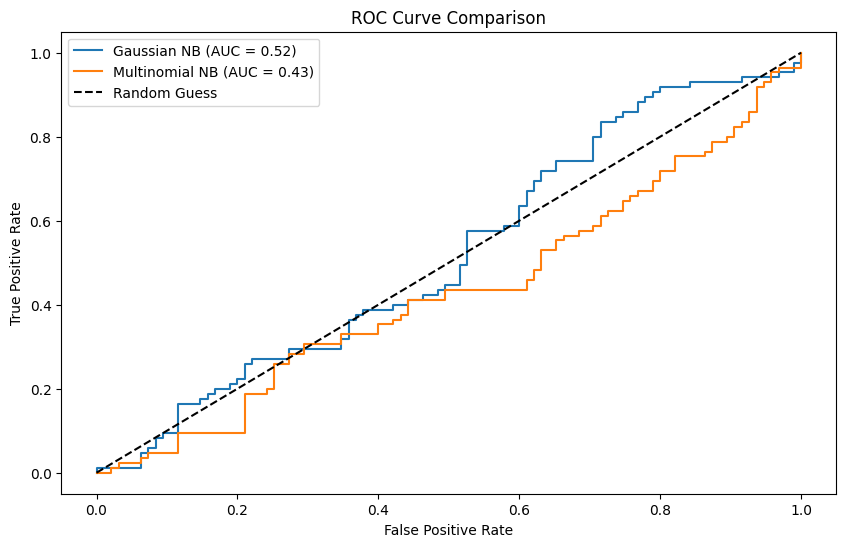

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for ROC (Gaussian NB)
y_prob_gnb = gnb.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = roc_auc_score(y_test, y_prob_gnb)

# Predict probabilities for ROC (Multinomial NB)
y_prob_mnb = mnb.predict_proba(X_test)[:, 1]
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, y_prob_mnb)
roc_auc_mnb = roc_auc_score(y_test, y_prob_mnb)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_gnb, tpr_gnb, label=f'Gaussian NB (AUC = {roc_auc_gnb:.2f})')
plt.plot(fpr_mnb, tpr_mnb, label=f'Multinomial NB (AUC = {roc_auc_mnb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


Interpretation: The ROC curve shows that Gaussian NB (AUC = 0.52) performs marginally better than random guessing, while Multinomial NB (AUC = 0.43) performs worse. Both models demonstrate poor predictive power, indicating the need for better feature selection or alternative classifiers.

ROC Curve

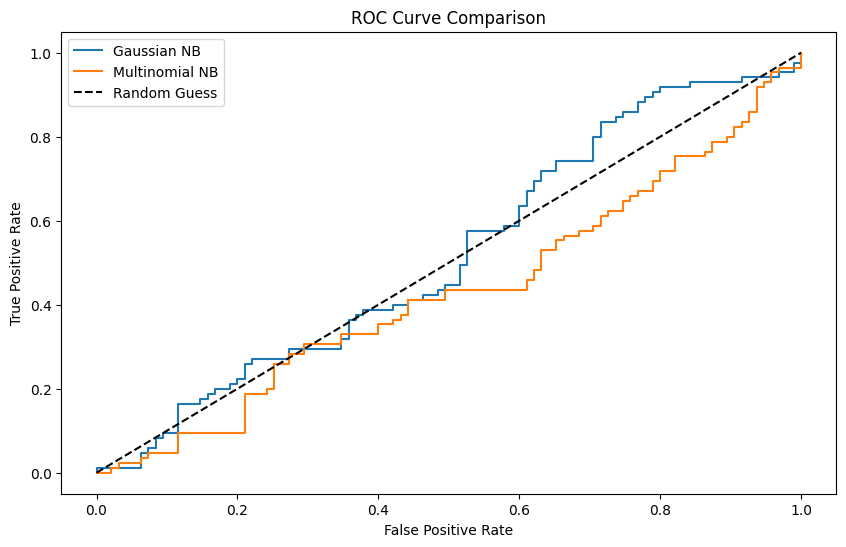

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for ROC (Gaussian NB)
y_prob_gnb = gnb.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)

# Predict probabilities for ROC (Multinomial NB)
y_prob_mnb = mnb.predict_proba(X_test)[:, 1]
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, y_prob_mnb)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_gnb, tpr_gnb, label='Gaussian NB')
plt.plot(fpr_mnb, tpr_mnb, label='Multinomial NB')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


Interpretation: The ROC curve shows that Gaussian NB (AUC = 0.52) performs marginally better than random guessing, while Multinomial NB (AUC = 0.43) performs worse. Both models demonstrate poor predictive power, indicating the need for better feature selection or alternative classifiers.